**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Rodrigo Antonio Martinez Zuniga
*   MATRÍCULA: 01795707

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Remove columns that will not be relevant to this activity: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [20]:
cars_df.drop(['id', 'id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], axis=1)

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Stores the number of observations or records in the dataframe in one variable and the number of columns in another (after deletion) for subsequent analysis.

In [34]:
#colums_cars = cars_df.count(axis=0)
#print (columns)
cars_df.count(axis=0)

id              426880
url             426880
region          426880
region_url      426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
county               0
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [35]:
#rows_cars = cars_df.count(axis=0)
#print (rows_cars)
cars_df.count(axis=1)

0          6
1          6
2          6
3          6
4          6
          ..
426875    23
426876    23
426877    22
426878    24
426879    22
Length: 426880, dtype: int64

## Missing Values

When the number of missing values in a column is large enough (approximately more than 25%), estimating and entering the missing values is meaningless, and deleting the attribute is better than estimating the missing values. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

However, this is not a rule applicable to all scenarios and there are many discussions around it. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

For this activity we will use a threshold of 0.70 of the number of records (those columns that have 70% non-null values). Also consider that we are assuming that these variables are MCAR or MAR without any graphical or statistical method.

2a) Determine the percentage of missing values per column and eliminate those that have 30% or more missing values. To do this, use the `thresh` parameter of the `dropna()` function. How many columns were removed?


In [6]:
df=cars_df.dropna(axis=0,thresh=cars_df.shape[1]*0.7)
print (df)

                id                                                url  \
27      7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...   
28      7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...   
29      7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...   
30      7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...   
31      7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
27       auburn   https://auburn.craigslist.

Also, when we have large data sets, we can delete rows that contain null values. Although, it is not recommended if the percentage of missing values in the data set is more than 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Delete records containing `NaN` in columns with less than 5% missing values using the subset parameter. What percentage of the initial records were deleted?

In [7]:
df=cars_df.dropna(axis=0,thresh=cars_df.shape[1]*0.05)
print (df)

                id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://presc

2c) If there are variables that still have missing values, use the appropriate imputation method (`mean, median, mode`)

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Atypical values

3a) Obtain the histogram of the variables `price`, `year` and `odometer` to observe their distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE327FF108>]],
      dtype=object)

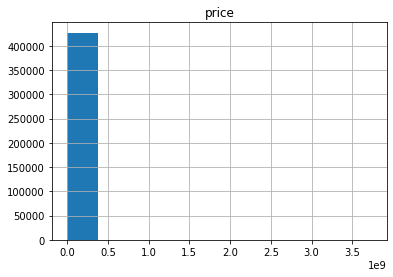

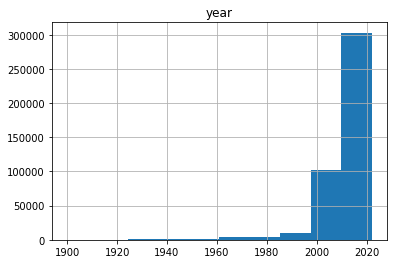

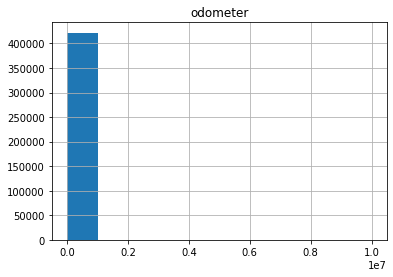

In [13]:
df.hist('price')
df.hist('year')
df.hist('odometer')

3b) Add the `age` column, calculated from `year`, to determine the years of the vehicle and once obtained, eliminate the `year` column. Generate the histogram of the new variable.

4a) To visualize if there are outliers, generate box plot graphs for the three variables (`price, age, odometer`)

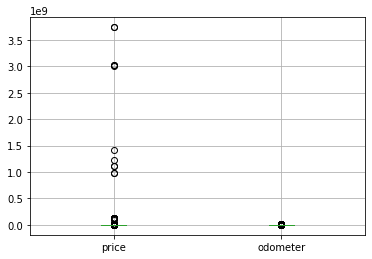

In [18]:
df.boxplot(column=['price','odometer'])

If the set of outliers is “relatively large” (although we know that they must be around 5% of the total data set), carry out a particular investigation on them that allows better decisions to be made.

4b) Calculate, for each variable, the percentage of its outliers and eliminate them from the dataframe. What percentage of the initial records were eliminated?

4c) Draw the histograms again to clearly observe the bias of the variables after eliminating the outliers.

# **Part 2**. Feature Engineering

## Transforming numeric variables

The distribution of the variables will determine which method to use and in what order. For example, on skewed variables the transformation should be performed first and then the scaling, since the desired effect is to "skew" the axis distributions and that effect is maximized when applied over the full range compared to applying it to variables with a skew unitary standard (by z-score) or variables in the range [0,1] (by Min-Max).

Applying this scaling before would compress most of the data into a narrow range. Then you should start by transforming the feature into Gaussian and then scaling it.

5a) Generate Q-Q graphs of the variables `price, age, odometer` to observe the differences between their distributions and the normal one.

The Box-Cox and Yeo-Johnson transformations are generalizations, as they include special cases of transformations: logarithmic (λ = 0), reciprocal (λ = -1), square root (λ = 0.5) and more exponents. In Box-Cox, several values of λ are evaluated and the one that gives the best transformation is selected.

The Yeo-Johnson transformation is an extension of the Box-Cox transformation that is no longer restricted to positive values. In other words, the Yeo-Johnson transformation can be used on variables with zero and negative values, as well as positive values. When the variable has only positive values, the Yeo-Johnson transformation is like the Box-Cox transformation of the variable plus one.

In this case, since the price and odometer variables have values of 0, we will use Yeo-Johnson.

5b) Apply the Yeo-Johnson transformation to reduce the bias in these variables. Do this in a copy of the dataframe that you will call transf_df.

5b) Apply the Yeo-Johnson transformation to reduce the bias in these variables. Do this in a copy of the dataframe that you will call `transf_df`.

5c) Redraw the Q-Q plots and histograms to observe the effect of the transformation.

## Scaling numeric variables

6a) As the three variables have different scales, apply the Min-Max method (to the dataframe obtained: `transf_df`) so that they remain in the fixed range [0 to 1]. Do this in a copy of the dataframe that you will name `minmax_df`.

In [22]:
print(df['price'].max())
print(df['price'].min())

3736928711
0


6b) Redraw the histograms to verify that scaling does not change the distribution.

## Coding categorical variables

7a) Use the `describe()` method to obtain the summary of the descriptive statistics on the categorical variables.

In [52]:
print (cars_df.describe())

                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.

7b) According to the observed cardinality, separate the names of the variables with high cardinality and low cardinality into two lists (`highly_cardinal_variables` and `few_cardinal_variables`) respectively.

7c) Display in bar graphs the frequencies of the categories for the variables with low cardinality (in `few_cardinal_variables`)

8. Apply *one-hot* encoding to the variables in `few_cardinal_variables`, dropping the first category (`drop='first'`). Place the result in a dataframe named `onehot_df`.

9. Apply binary encoding to the variables in `highly_cardinal_variables`.

Concatenates the obtained dataframes: minmax_df (whose numerical variables are already transformed and scaled) and the previous encodings (onehot_df and binary_df). Take into account that if the indexes of the dataframes do not match, the concatenation will not be carried out correctly. Use reset_index(drop=True, inplace=True) to reset the indexes.